In [255]:
import pandas as pd

In [256]:
df = pd.read_csv('customer_churn_data.csv')

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [258]:
df["InternetService"]=df["InternetService"].fillna(" ")

In [259]:
df.isna().sum()

CustomerID         0
Age                0
Gender             0
Tenure             0
MonthlyCharges     0
ContractType       0
InternetService    0
TotalCharges       0
TechSupport        0
Churn              0
dtype: int64

In [260]:
df.duplicated().sum()

0

In [261]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [262]:
numeric_cols_data = df.select_dtypes(include = ['number'])

In [263]:
numeric_cols_data.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


In [264]:
import matplotlib.pyplot as plt


Text(0, 0.5, '')

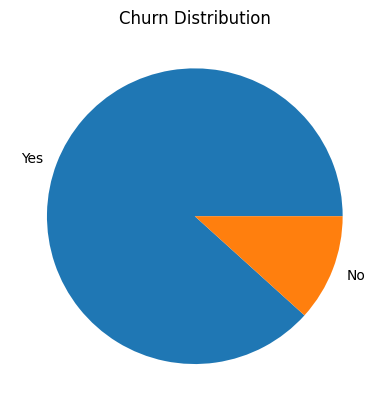

In [265]:
df["Churn"].value_counts().plot(kind = "pie")
plt.title("Churn Distribution")
plt.ylabel("")

In [266]:
df.head(2)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.4,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.0,Yes,Yes


In [267]:
df.groupby("Churn")["MonthlyCharges"].mean()

Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

In [268]:
df.groupby(["Churn","Gender"])["MonthlyCharges"].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

In [269]:
df.groupby("Churn")["Tenure"].mean()

Churn
No     30.264957
Yes    17.476784
Name: Tenure, dtype: float64

In [270]:
df.groupby("Churn")["Age"].mean()

Churn
No     43.487179
Yes    44.831257
Name: Age, dtype: float64

Text(0.5, 1.0, 'Contract Type by average Monthly Price')

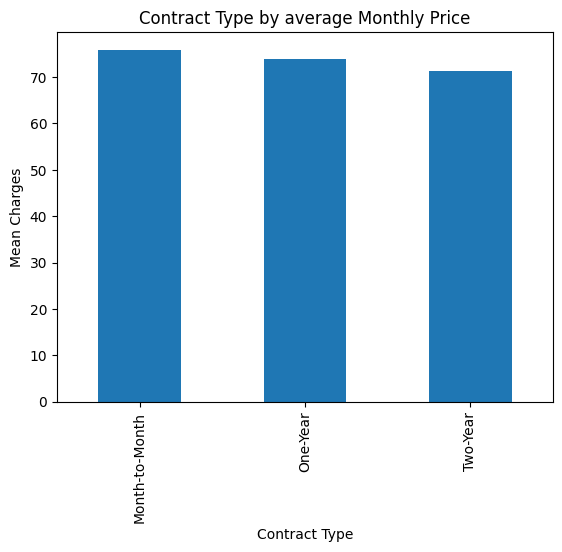

In [271]:
df.groupby("ContractType")["MonthlyCharges"].mean().plot(kind='bar')
plt.xlabel("Contract Type")
plt.ylabel("Mean Charges")
plt.title("Contract Type by average Monthly Price")


Text(0.5, 1.0, 'Histogram of Tenure')

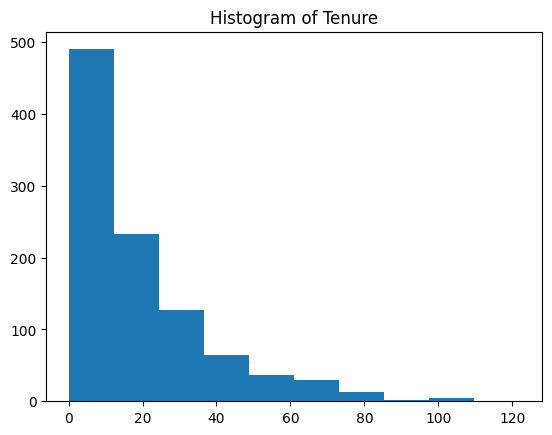

In [272]:
plt.hist(df['Tenure'])
plt.title("Histogram of Tenure")

In [ ]:
Y = df[['Churn']]
X = df[['Age', 'MonthlyCharges', 'Tenure','Gender']]

In [274]:
Y['Churn']

0      Yes
1      Yes
2      Yes
3      Yes
4      Yes
      ... 
995    Yes
996    Yes
997    Yes
998    Yes
999    Yes
Name: Churn, Length: 1000, dtype: object

In [275]:
X

,Age,MonthlyCharges,Tenure,Gender
0,49,88.35,4,Male
1,43,36.67,0,Male
2,51,63.79,2,Female
3,60,102.34,8,Female
4,42,69.01,32,Male
...,...,...,...,...
995,42,37.14,41,Male
996,62,80.93,9,Male
997,51,111.72,15,Female
998,39,65.67,68,Male


In [276]:
X['Gender'] = X["Gender"].apply(lambda x: 1 if x == 'Female' else 0)

C:\Users\suma4\AppData\Local\Temp\ipykernel_3200\312834728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = X["Gender"].apply(lambda x: 1 if x == 'Female' else 0)


In [277]:
X["Gender"].value_counts()

Gender
1    538
0    462
Name: count, dtype: int64

In [278]:
Y["Churn"] = Y["Churn"].apply(lambda x : 1 if x == 'Yes' else 0)

C:\Users\suma4\AppData\Local\Temp\ipykernel_3200\304698117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y["Churn"] = Y["Churn"].apply(lambda x : 1 if x == 'Yes' else 0)


In [279]:
Y.value_counts()

Churn
1        883
0        117
Name: count, dtype: int64

In [280]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [281]:
from sklearn.preprocessing import StandardScaler
#standard scaler is used to standardize the features at a same scale, ie. mean of 0 and a standard deviation of 1
scaler = StandardScaler()

In [282]:
X_train = scaler.fit_transform(X_train)

In [283]:
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [284]:
X_test = scaler.fit_transform(X_test)

In [285]:
from sklearn.metrics import accuracy_score
def model_performance(predictions):
    print("Accuracy score on model is {}".format(accuracy_score(Y_test, predictions)))

In [286]:
#hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

In [287]:
from sklearn.linear_model import LogisticRegression

In [288]:
log_model = LogisticRegression()

In [289]:
Y_train.value_counts()

Churn
1        702
0         98
Name: count, dtype: int64

In [290]:
log_model.fit(X_train, Y_train)

C:\Users\suma4\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [293]:
y_pred = log_model.predict(X_test)

In [294]:
model_performance(y_pred)

Accuracy score on model is 0.895


In [295]:
from sklearn.neighbors import KNeighborsClassifier

In [296]:
param_grid = {
    "n_neighbors": [3,5,7,9],
    "weights": ['uniform', 'distance'],
}

In [297]:
gridkn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

In [298]:
gridkn.fit(X_train, Y_train)

C:\Users\suma4\AppData\Roaming\Python\Python312\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\suma4\AppData\Roaming\Python\Python312\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\suma4\AppData\Roaming\Python\Python312\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\suma4\AppData\Roaming\Python\Python312\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was

,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': [3, 5, ...], 'weights': ['uniform', 'distance']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,9


In [299]:
gridkn.best_params_

{'n_neighbors': 9, 'weights': 'uniform'}

In [300]:
y_pred = gridkn.predict(X_test)

In [301]:
model_performance(y_pred)

Accuracy score on model is 0.89


Support Vector Machine

In [ ]:
from sklearn.svm import SVC

In [303]:
svm = SVC()

In [304]:
param_grid = {
    "C" : [0.01, 0.1, 0.5, 1],
    "kernel" : ['linear', 'rbf', 'poly']
}

In [305]:
gridsvc = GridSearchCV(svm, param_grid, cv=5)

In [306]:
gridsvc.fit(X_train, Y_train)

C:\Users\suma4\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\suma4\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\suma4\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\suma4\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was pass

,estimator,SVC()
,param_grid,"{'C': [0.01, 0.1, ...], 'kernel': ['linear', 'rbf', ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,0.01


In [307]:
gridsvc.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [309]:
y_pred = gridsvc.predict(X_test)

In [310]:
model_performance(y_pred)

Accuracy score on model is 0.905


In [311]:
from sklearn.tree import DecisionTreeClassifier

In [315]:
params_grid = {
    "criterion" : ['gini', 'entropy'],
    "splitter" : ['best', 'random'],
    "max_depth" : [None, 20, 30, 40],
    "min_samples_split" : [2, 5, 10],
    "min_samples_leaf" : [1, 2, 4]
}

In [316]:
grid_tree = GridSearchCV(DecisionTreeClassifier(), params_grid, cv=5)

In [317]:
grid_tree.fit(X_train, Y_train)

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [None, 20, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [318]:
grid_tree.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'splitter': 'random'}

In [319]:
y_pred = grid_tree.predict(X_test)

In [320]:
model_performance(y_pred)

Accuracy score on model is 0.845


In [321]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()

In [323]:
param_grid = {
    "n_estimators": [32, 64, 128, 256],
    "max_features": [2,3,4],
    "bootstrap": [True, False]
}

In [324]:
grid_rfc = GridSearchCV(rfc_model, param_grid, cv=5)

In [325]:
grid_rfc.fit(X_train, Y_train)

C:\Users\suma4\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\suma4\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\suma4\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\suma4\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed whe

,estimator,RandomForestClassifier()
,param_grid,"{'bootstrap': [True, False], 'max_features': [2, 3, ...], 'n_estimators': [32, 64, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,256


In [326]:
grid_rfc.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 256}

In [329]:
y_pred = grid_rfc.predict(X_test)

In [330]:
model_performance(y_pred)

Accuracy score on model is 0.9


In [332]:
best_model = gridsvc.best_estimator_

In [333]:
joblib.dump(best_model, 'model.pkl')

['model.pkl']

In [334]:
X.columns

Index(['Age', 'MonthlyCharges', 'Tenure', 'Gender'], dtype='object')